In [299]:
#Veri İşleme ve görselleştirme için gerekli olan kütüphanlerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
#Datasetin yüklenmesi
df = pd.read_csv('data/iris.csv')

In [303]:
#Datasetin iik 3 satırını ekrana yazdırma
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [305]:
#Dataset hakkında bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [307]:
#datanın şekli
df.shape

(150, 6)

In [309]:
#Sayısal kolonların istatistikleri
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [311]:
#Label değerlerimiz
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [313]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [315]:
feature_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
labels = df['Species']

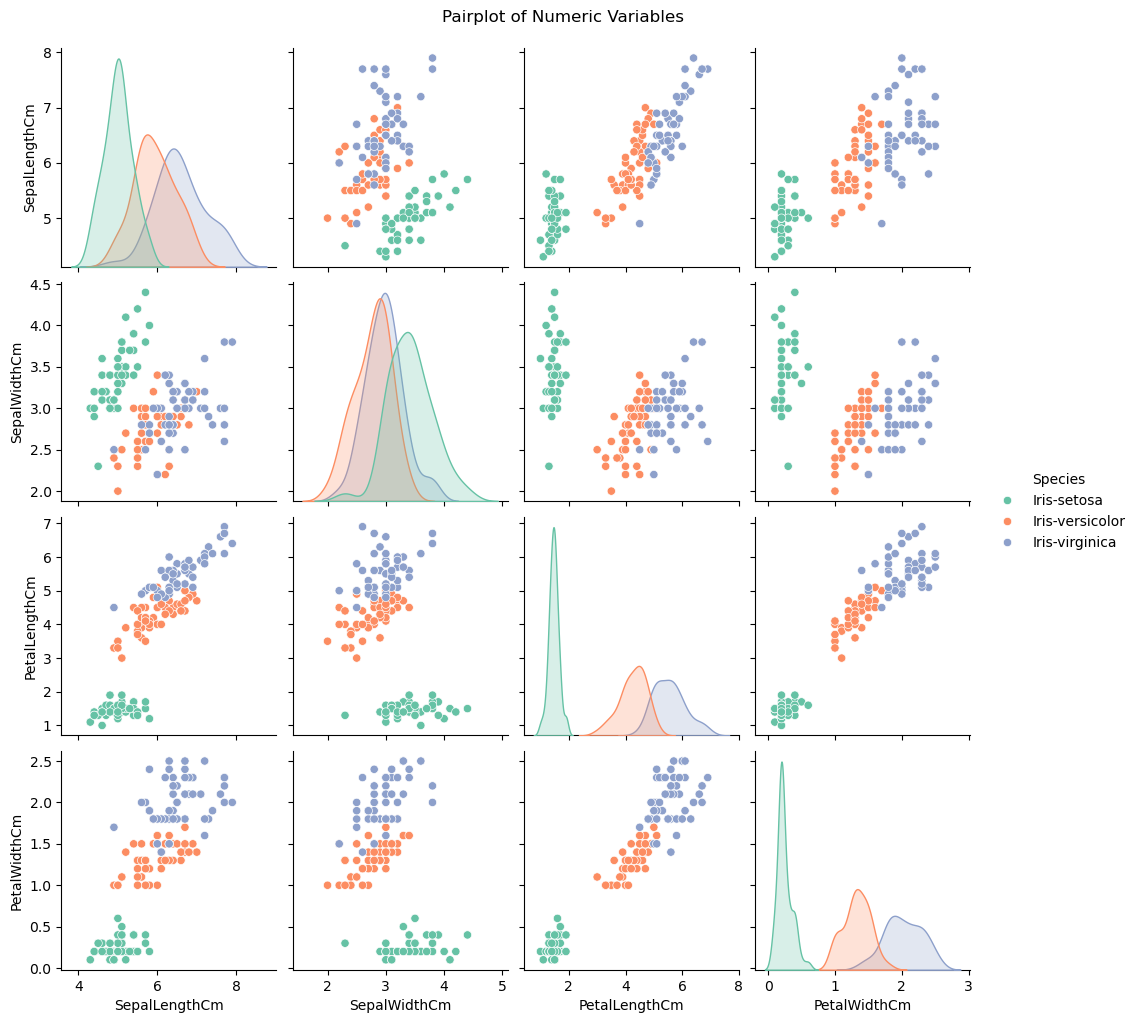

In [317]:
#Numerik değerler için pairplot grafiği
sns.pairplot(df.drop('Id',axis=1),hue='Species',palette='Set2')

plt.suptitle('Pairplot of Numeric Variables',y=1.02)
plt.show()

<Figure size 640x480 with 0 Axes>

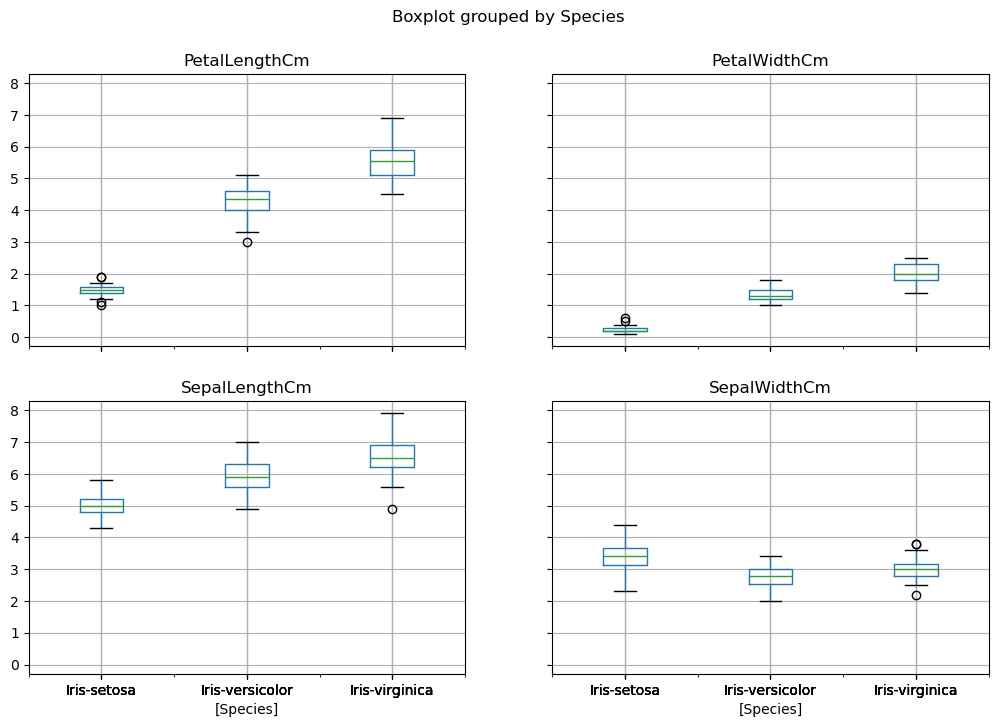

In [318]:
#boxplot grafiği 

plt.figure()

df.drop('Id',axis=1).boxplot(by='Species',figsize=(12,8))

plt.show()

In [323]:
#Feature matrisimiz
X = df[feature_col].values

#Label vektörümüz
y = df['Species'].values

In [325]:
print('X shape:', X.shape)
print('y shape:',y.shape)

X shape: (150, 4)
y shape: (150,)


In [327]:
from sklearn.preprocessing import LabelEncoder

In [329]:
#Y encode ediliyor
le =  LabelEncoder()
y=le.fit_transform(y)

In [331]:
from sklearn .model_selection import train_test_split

In [604]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [606]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_train Shape:', y_test.shape)

X_train Shape: (90, 4)
X_test Shape: (60, 4)
y_train Shape: (90,)
y_train Shape: (60,)


In [608]:
from sklearn.neighbors import KNeighborsClassifier

In [610]:
#knn için fonksiyon
def sklearn_knn(X_test,X_train,y_train,k):

    #classifier yarat 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    predict_label = knn.predict(X_test)

    return predict_label
    

In [630]:
#fonksiyonu çağırıp değerleri tuttuk
y_predict=sklearn_knn(X_test,X_train,y_train,5)

In [632]:
#dataframe nesnesinde karşılaştırdık
pd.DataFrame( {'Actual Label' : y_test, 'Predicted Label' : y_predict}).head()

,Actual Label,Predicted Label
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2


In [634]:
from sklearn.metrics import accuracy_score

In [636]:
#accuracy skorumuz
accur_score = accuracy_score(y_test,y_predict)
print(f'ACCURACY SCORE:{round(accur_score,4)*100}')

ACCURACY SCORE:96.67


In [638]:
n = np.sqrt(len(X_test)) #Max k değeri (1,12)

#accurac değerlerimiz için liste
k_values = []


#tüm k değerlerine tek tek bakıyoruz
for k in range(1,13):

    pred = sklearn_knn(X_test,X_train,y_train,k)

    accur = accuracy_score(y_test,pred)

    k_values.append(accur)

In [640]:
k_values

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333]

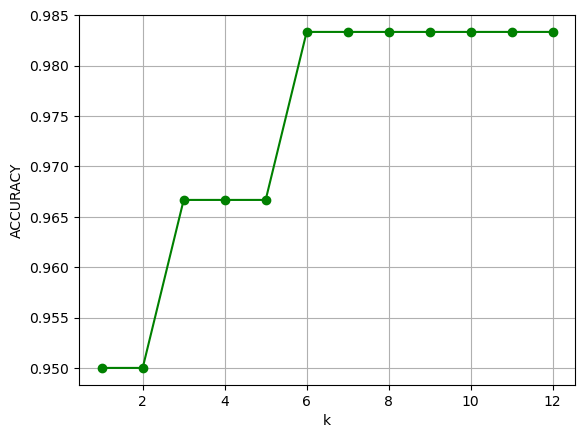

In [660]:
# Şimdi bu K değerlerine göre elde ettiğimiz Accuracy'leri çizelim
plt.plot(range(1,13),k_values,c='g',marker='o')

plt.xlabel('k')
plt.ylabel('ACCURACY')

plt.grid(True)

plt.show()

In [668]:

#K=6 dan sonra gerisi aynı accuracy ile kaldı.

#O yüzden en iyi K değeri, bu veri seti için, 6 diyebiliriz.

#Çünkü her ikisi de aynı doğruluk oranını verse de K=6 daha az kompleks bir model yani sade.

#ml de sadelik neredeyse her zaman için iyidir diyebiliriz.
